# Hierarchical KMeans
Hierarchical KMeans gồm 2 thuật toán là agglomerative clustering and divisive clustering:
* Agglomerative clustering: Đây là cách tiếp cận bottom-up. Tức là coi mỗi sample như là một cluster sau đó tiến hành bắt cặp các cụm và gom lại cứ thế tuần tự
* Divisive clustering: Đây là cách tiếp cận top-down. Ban đầu coi tất cả samples đều chung 1 cluster. Sau đó split chúng theo từng tự.

Ở bài thực hành này chúng ta sẽ tiến hành khảo sát thuật toán agglomerative clustering với các linkage distances của 2 cụm như:
* Ward
* Complete
* Single
* Average

Ở phần demo chúng ta sẽ nhìn sơ qua về hiệu quả của từng loại distance

In [1]:
print(__doc__)
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering

import numpy as np            
import pandas as pd 




Automatically created module for IPython interactive environment


# Bài Tập

1. Dùng thư viện sch.dendrogram để vẽ ra dendrogram chọn ra số cụm thích hợp và dùng hierachical kmeans để gom cụm lại.
2. Vẽ hình biểu diễn các cụm
 * Lưu ý dùng cả 4 distances ở trên

In [2]:
# import the datset
dataset = pd.read_csv('https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-06/bt1.csv')
X = dataset.iloc[:,[3,4]].values

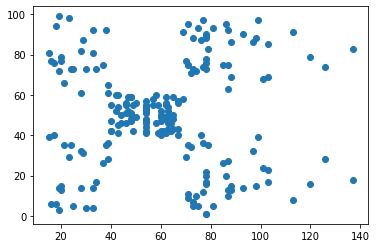

In [3]:
# Scatter của dữ liệu gốc
plt.scatter(X[:,0],X[:,1])

ward :	0.00s
average :	0.00s
complete :	0.00s
single :	0.00s


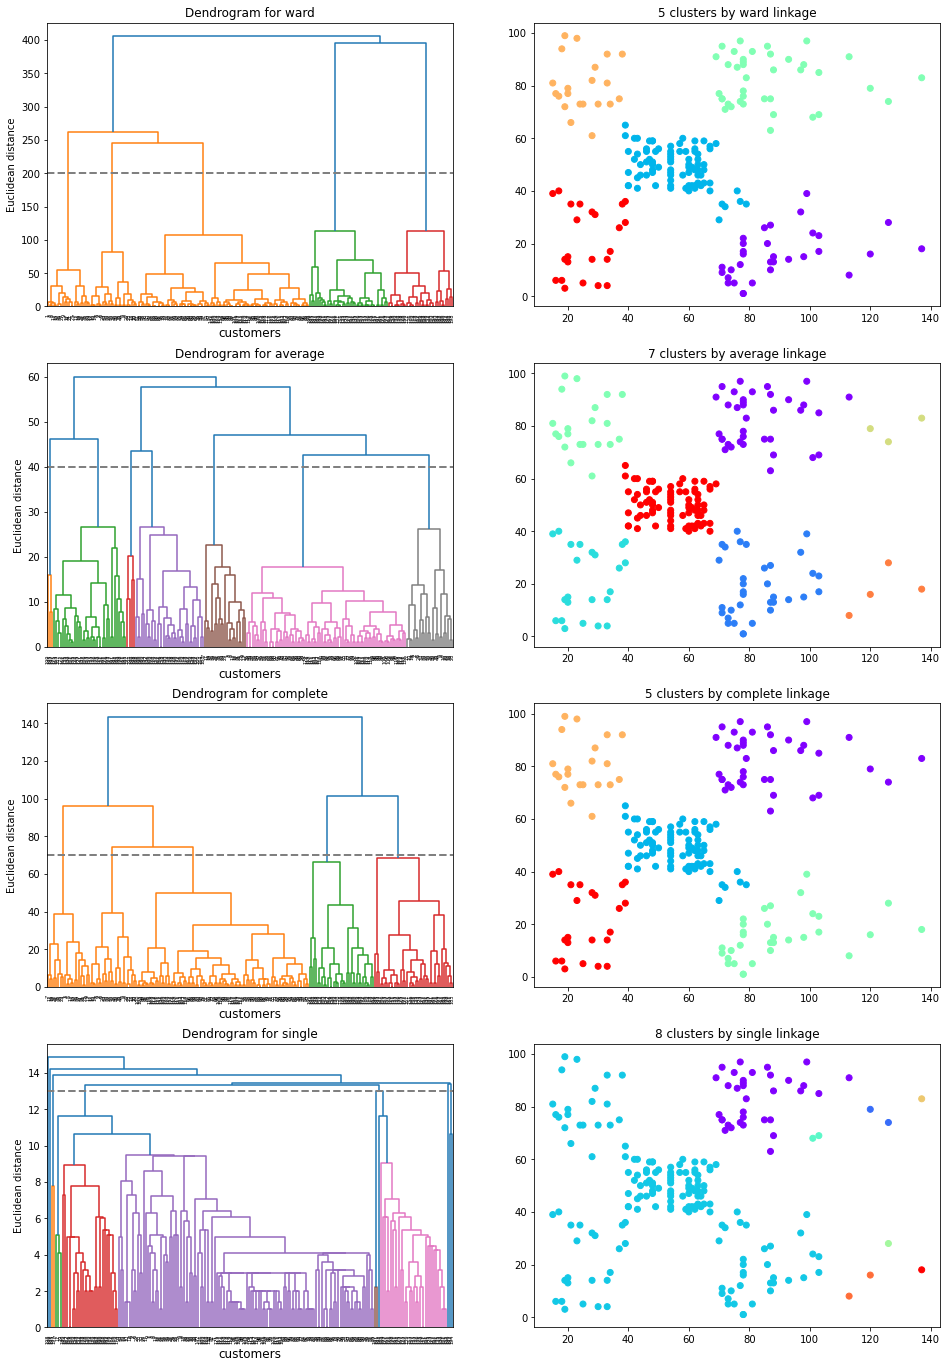

In [4]:
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as sch


linkages = ['ward', 'average', 'complete', 'single']
threshold = [200,40,70,13]
fig, ax = plt.subplots(4,2,figsize=(16,24))

# make a dendogram used ward method
for i, linkage in enumerate(linkages):
    sch.dendrogram(sch.linkage(X, method = linkage), ax = ax[i,0])
    ax[i,0].axhline(y=threshold[i], c='grey', lw=2, linestyle='dashed')
    ax[i,0].set_ylabel('Euclidean distance', fontsize = 10)
    ax[i,0].set_title('Dendrogram for '+ linkage)
    ax[i,0].set_xlabel('customers', fontsize = 12)
    #Từ đây hãy chọn só cụm thích hơp và phân cụm bằng thuật toán agglomerative clustering
    cluster = AgglomerativeClustering(n_clusters = None, affinity='euclidean', linkage=linkage, distance_threshold=threshold[i])
    t0 = time()
    cluster.fit_predict(X)
    print("%s :\t%.2fs" % (linkage, time() - t0))
    ax[i,1].scatter(X[:,0], X[:,1], c = cluster.labels_, cmap='rainbow')
    ax[i,1].set_title(str(cluster.n_clusters_) +' clusters by '+ linkage + ' linkage', fontsize = 12)





#### Khi một cụm lớn được hình thành, khoảng cách dọc dài nhất mà có bất kỳ đường ngang nào đi qua nó sẽ được chọn và một đường ngang được vẽ qua nó. Nghĩa là, số đường dọc mà đường ngang mới tạo này đi qua bằng số cụm.

ward :	0.00s
Have 5 clusters
auto


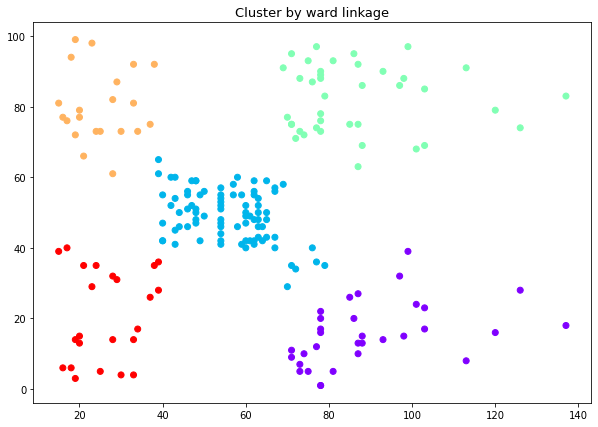

average :	0.00s
Have 5 clusters
auto


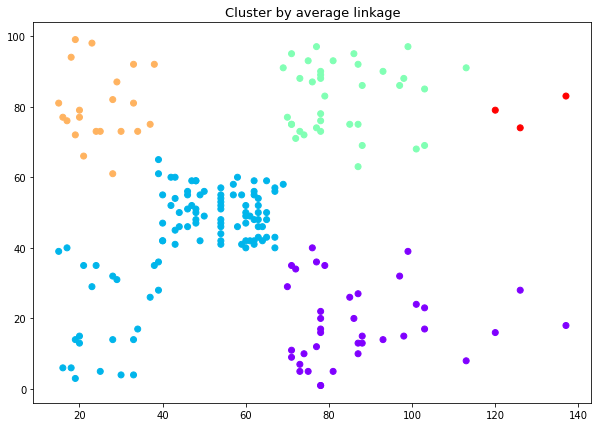

complete :	0.00s
Have 5 clusters
auto


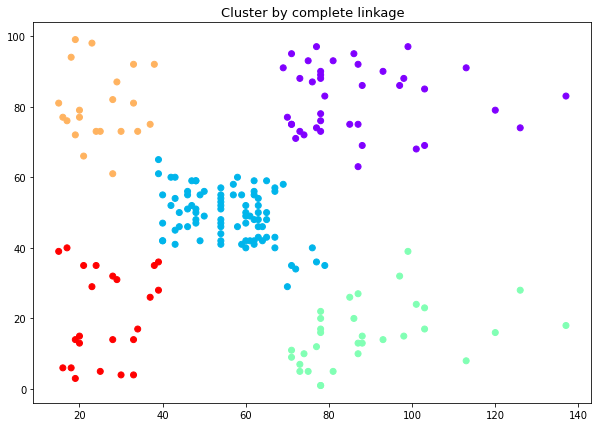

single :	0.00s
Have 5 clusters
auto


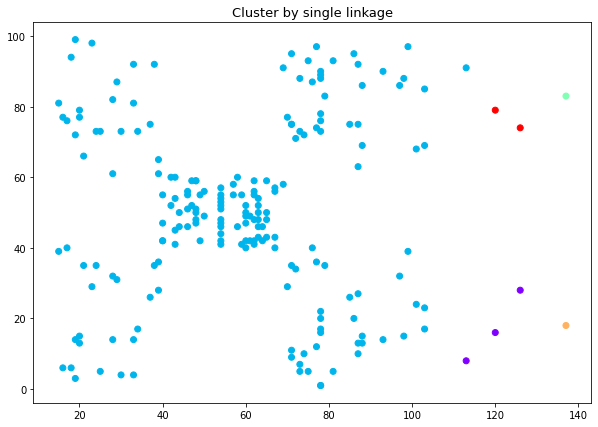

In [5]:
# agglomerative clustering 

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    cluster = AgglomerativeClustering(n_clusters = 5, affinity='euclidean', linkage=linkage, distance_threshold=None)
    t0 = time()
    cluster.fit_predict(X)
    print("%s :\t%.2fs" % (linkage, time() - t0))
    print('Have {} clusters'.format(cluster.n_clusters_))
    print(cluster.compute_full_tree)
    fig = plt.figure(figsize=(10, 7))
    plt.title('Cluster by '+ linkage + ' linkage', fontsize = 13)
    plt.scatter(X[:,0], X[:,1], c = cluster.labels_, cmap='rainbow')
    plt.show()

#### Khi có 5 cụm, Ward linkage và Complete linkage tốt hơn so với các liên kết khác. Như Chúng ta đã thấy dendrogram của các liên kết ở trên